In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

# Question 1

## a) Create points in unit ball with different dimensions

In [3]:
def create_point_unit_ball(dim: int):
    x = np.random.normal(0, 1, dim)
    x_norm = np.linalg.norm(x)
    x = x / x_norm

    a = np.random.uniform(0, 1)
    rho = np.power(a, 1/dim)
    y = rho * x
    return y

In [4]:
def create_points_unit_ball(n: int, dim: int):
    return [create_point_unit_ball(dim) for _ in range(n)]

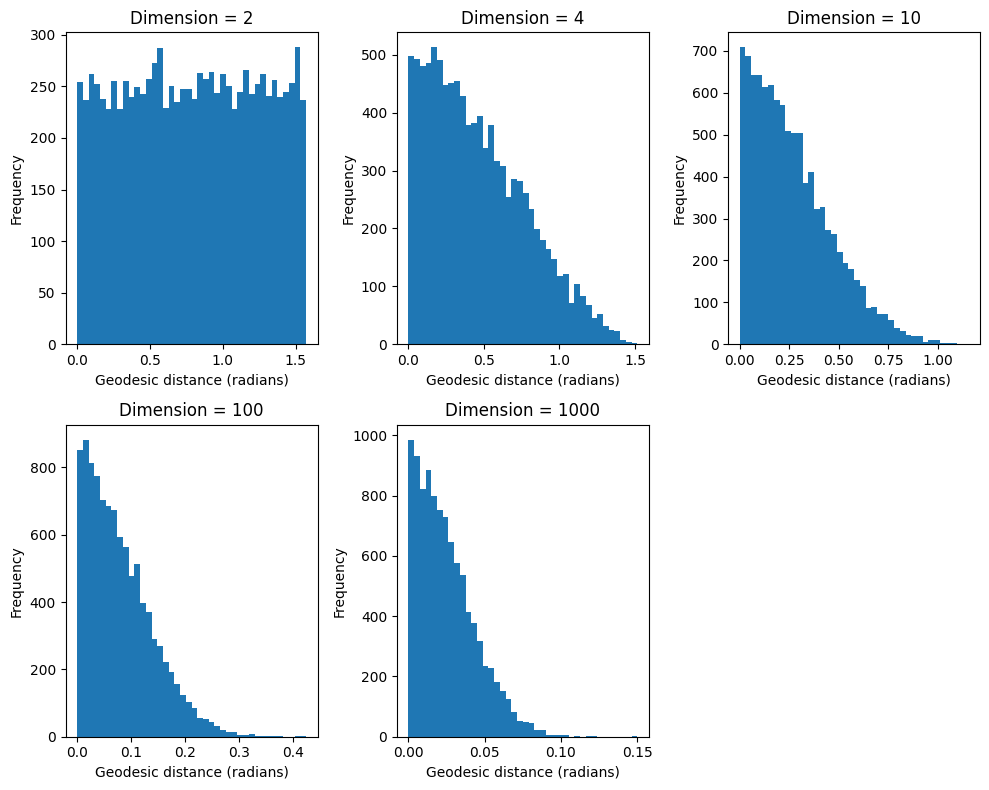

In [5]:
def geodesic_distance_to_equator(points):
    pts = np.asarray(points)
    single = (pts.ndim == 1)
    if single:
        pts = pts[np.newaxis, :]

    norms = np.linalg.norm(pts, axis=1)
    zero_mask = (norms == 0.0)
    ratio = np.zeros_like(norms)
    nonzero = ~zero_mask
    ratio[nonzero] = np.abs(pts[nonzero, -1]) / norms[nonzero]

    dists = np.arcsin(ratio)
    dists[zero_mask] = np.nan

    return dists[0] if single else dists


dims = [2, 4, 10, 100, 1000]
result_distance_to_eq = {}
n_points = 10_000

plt.figure(figsize=(10, 8))

for i, dim in enumerate(dims, 1):
    points = create_points_unit_ball(n_points, dim)
    distances = geodesic_distance_to_equator(points)

    plt.subplot(2, 3, i)
    plt.hist(distances, bins=40)
    plt.title(f"Dimension = {dim}")
    plt.xlabel("Geodesic distance (radians)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## b) Geodesic Distances to Equator and a Random Hyperplane

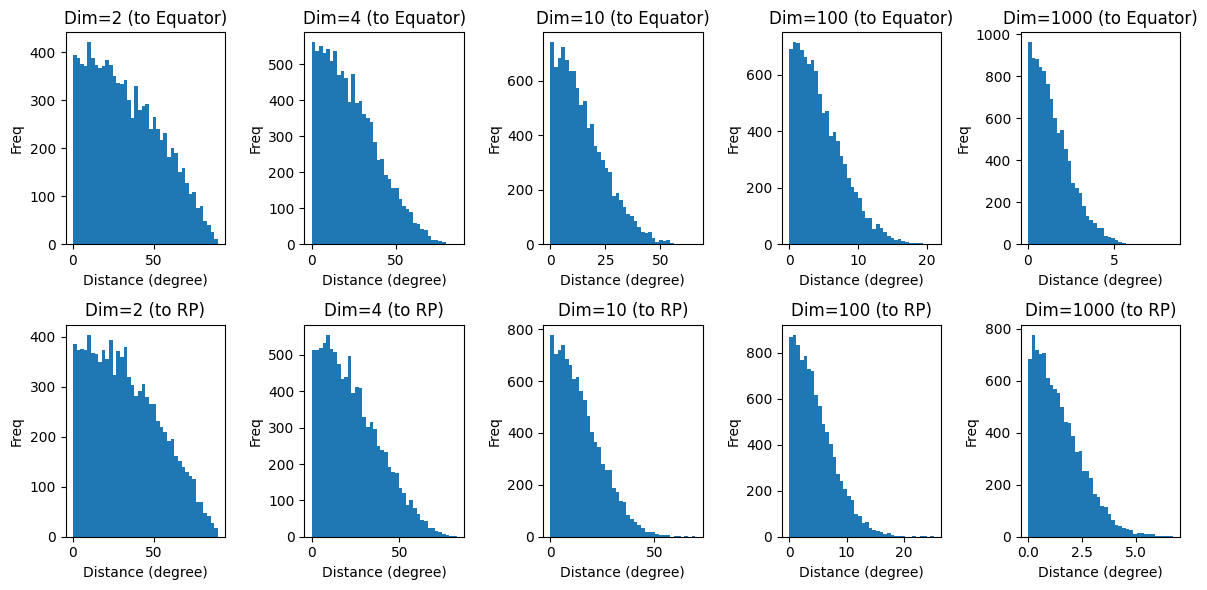

In [6]:
def geodesic_dist_to_equator(points):
    pts = np.asarray(points)
    norms = np.linalg.norm(pts, axis=1)
    ratio = np.abs(pts[:, -1]) / norms
    theta = np.arcsin(ratio)
    theta_deg = np.degrees(theta)
    return theta_deg

def geodesic_dist_to_random_plane(points):
    pts = np.asarray(points)
    n = pts.shape[1]
    normal = np.random.normal(0, 1, n)
    normal = normal / np.linalg.norm(normal)

    norms = np.linalg.norm(pts, axis=1)
    unit_pts = pts / norms[:, None]
    ratio = np.abs(unit_pts @ normal)
    theta = np.arcsin(ratio)
    theta_deg = np.degrees(theta)
    return theta_deg


dims = [2, 4, 10, 100, 1000]
n_points = 10_000

plt.figure(figsize=(12, 6))

for col, d in enumerate(dims, start=1):

    points = create_points_unit_ball(n_points, d + 1)
    dist_eq = geodesic_dist_to_equator(points)
    dist_rand = geodesic_dist_to_random_plane(points)

    plt.subplot(2, len(dims), col)
    plt.hist(dist_eq, bins=40)
    plt.title(f"Dim={d} (to Equator)")
    plt.xlabel("Distance (degree)")
    plt.ylabel("Freq")

    plt.subplot(2, len(dims), col + len(dims))
    plt.hist(dist_rand, bins=40)
    plt.title(f"Dim={d} (to RP)")
    plt.xlabel("Distance (degree)")
    plt.ylabel("Freq")

plt.tight_layout()
plt.show()

## c) Angle Behavior of Random Points on Unit Ball

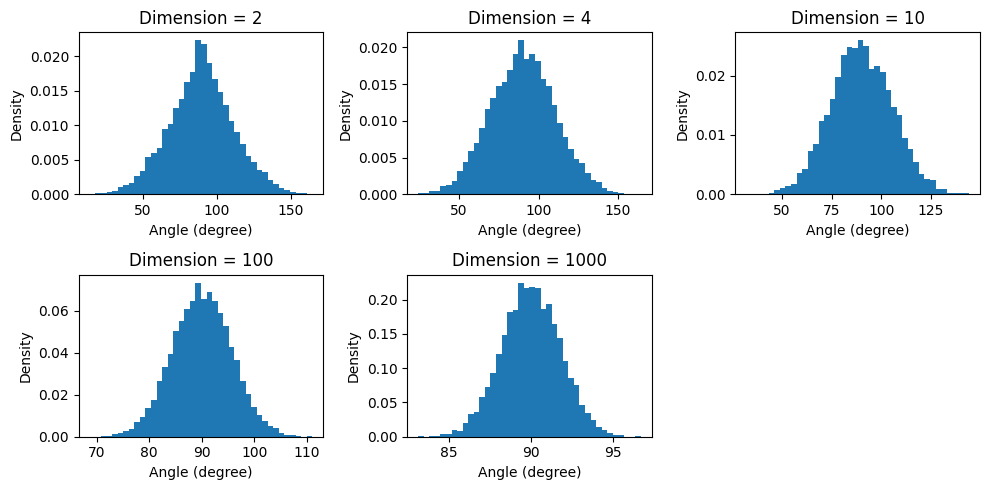

In [7]:
def angle_between(x, y):
    theta = np.arccos(np.dot(x, y))
    theta_deg = np.degrees(theta)
    return theta_deg


dims = [2, 4, 10, 100, 1000]
num_pairs = 10000

dimension_angles = {}
for dim in dims:
    angles = []
    for _ in range(num_pairs):
        x = create_point_unit_ball(dim)
        y = create_point_unit_ball(dim)
        theta = angle_between(x, y)
        angles.append(theta)
    dimension_angles[dim] = np.array(angles)


plt.figure(figsize=(10, 5))

for i, dim in enumerate(dims, 1):
    plt.subplot(2, 3, i)
    plt.hist(dimension_angles[dim], bins=40, density=True)
    plt.title(f"Dimension = {dim}")
    plt.xlabel("Angle (degree)")
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

## d) Mean of Angles and Distances to Equator

In [41]:
dims = [2, 4, 10, 100, 1000]
n_points = 10_000

points = {}
for dim in dims:
    points[dim] = create_points_unit_ball(n_points, dim)

### Mean Distance To Equator

In [42]:
result1 = []

for dim in points.keys():
    points_per_dim = points[dim]
    distances = geodesic_distance_to_equator(points_per_dim)
    mean_distances = sum(distances) / len(distances)
    result1.append({'dimension': dim, 'point': n_points, 'Mean Distance To Equator': mean_distances})

result1 = pd.DataFrame(result1)
result1

,dimension,point,Mean Distance To Equator
0,2,10000,0.789153
1,4,10000,0.464556
2,10,10000,0.267452
3,100,10000,0.080448
4,1000,10000,0.025238


### Mean angles

In [43]:
result2 = []
for dim in points.keys():
    points_per_dim = points[dim]
    x_points = points_per_dim[:5000]
    y_points = points_per_dim[5000:]
    num_pairs = n_points // 2
    angles = []

    for i in range(num_pairs):
        x = x_points[i]
        y = y_points[i]
        theta = angle_between(x, y)
        angles.append(theta)
    mean_angles = sum(angles) / len(angles)
    result2.append({'dimension': dim, 'point': n_points, 'Mean angle': mean_angles})


result2 = pd.DataFrame(result2)
result2

,dimension,point,Mean angle
0,2,10000,90.299995
1,4,10000,89.456626
2,10,10000,89.679869
3,100,10000,89.979764
4,1000,10000,90.009036


### Check d * E[distance]

In [45]:
result3 = []

for dim in points.keys():
    points_per_dim = points[dim]
    distances = geodesic_distance_to_equator(points_per_dim)

    mean_distances = distances.mean()
    scaled_value = dim * mean_distances

    result3.append({
        'dimension': dim,
        'Mean Distance to Equator': mean_distances,
        'd × Mean Distance': scaled_value
    })

result3 = pd.DataFrame(result3)
result3

,dimension,Mean Distance to Equator,d × Mean Distance
0,2,0.789153,1.578306
1,4,0.464556,1.858226
2,10,0.267452,2.674518
3,100,0.080448,8.044829
4,1000,0.025238,25.238175


# Question 2

## a) Generate points in d-dimension Cube

In [46]:
def generate_points_in_cube(dim: int, num_points: int):
    return np.random.uniform(-0.5, 0.5, size=(num_points, dim))


dims = [2, 3, 5, 10, 20]
n_points = 1000

points_in_cube = {}
for dim in dims:
    points_in_cube[dim] = generate_points_in_cube(dim=dim, num_points=n_points)

## b) Monte Carlo Estimation of d-Dimensional Sphere Volume

In [47]:
def mc_sphere_volume(dim: int, num_samples: int, radius: float):
    X = np.random.uniform(-radius, radius, size=(num_samples, dim))
    norms_sq = np.sum(X**2, axis=1)
    inside = (norms_sq <= radius*radius)
    k = inside.sum()

    frac = k / num_samples
    cube_vol = (2 * radius) ** d
    estimate = frac * cube_vol

    return estimate

def mean_pairwise_distance(points):
    dists = []
    for i in range(len(points)):
        for j in range(i+1, len(points)):
            d = np.linalg.norm(points[i] - points[j])
            dists.append(d)
    return np.mean(dists)


def mean_nearest_neighbor(points):
    tree = cKDTree(points)
    dists, _ = tree.query(points, k=2)
    nn_dists = dists[:, 1]
    return np.mean(nn_dists)


result_2b = []
for dim in dims:
    volume = mc_sphere_volume(dim=dim, num_samples=n_points, radius=0.5)
    mean_dist = mean_pairwise_distance(points_in_cube[dim])
    mean_nearest_distance = mean_nearest_neighbor(points_in_cube[dim])
    result_2b.append({'Dim': dim, 'Points': n_points, 'Sphere Volume (MC)': volume,
                      'Mean Distance': mean_dist, 'Mean Nearest Distance': mean_nearest_distance})

result_2b = pd.DataFrame(result_2b)
result_2b

,Dim,Points,Sphere Volume (MC),Mean Distance,Mean Nearest Distance
0,2,1000,0.788,0.533893,0.015839
1,3,1000,0.538,0.666605,0.057862
2,5,1000,0.160,0.882778,0.178935
3,10,1000,0.004,1.264372,0.499553
4,20,1000,0.000,1.815232,1.047879


## c) Plot the analysis results

### Scatter plot of first two dimensions

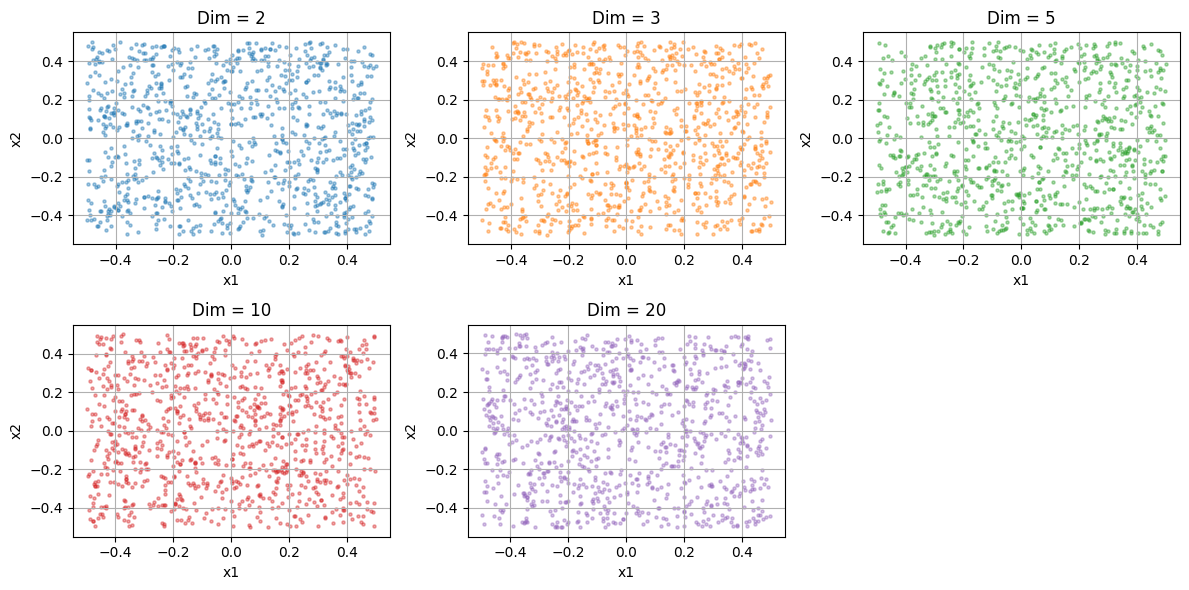

In [54]:
colors = plt.cm.tab10(range(len(dims)))

cols = 3
rows = int(np.ceil(len(dims) / cols))

plt.figure(figsize=(12, 6))

for i, dim in enumerate(dims):
    pts = points_in_cube[dim]

    if dim >= 2:
        plt.subplot(rows, cols, i+1)
        plt.scatter(pts[:, 0], pts[:, 1], s=5, alpha=0.4, color=colors[i])
        plt.title(f"Dim = {dim}")
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.grid(True)

plt.tight_layout()
plt.show()

### Comparison of Volume, Pairwise Distance, and Nearest-Neighbor Distance

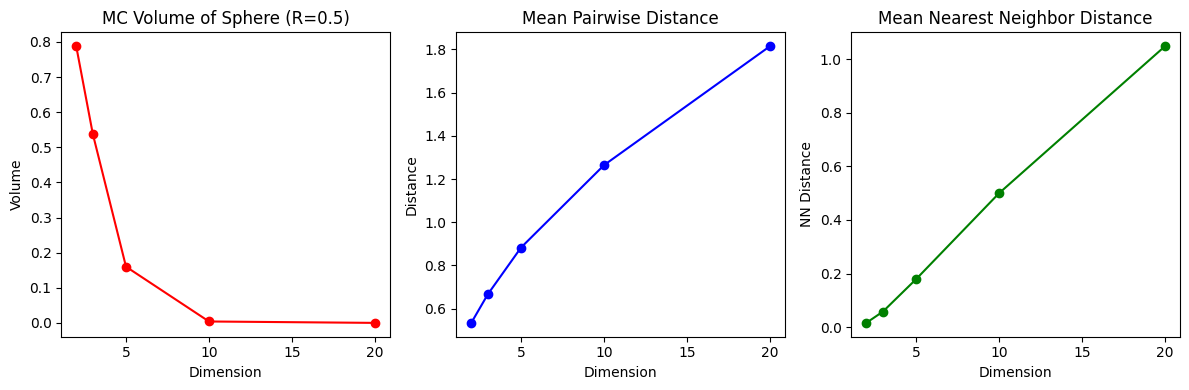

In [55]:
plt.figure(figsize=(12, 4))

# Volume of sphere vs dimension
plt.subplot(1, 3, 1)
plt.plot(result_2b['Dim'], result_2b['Sphere Volume (MC)'], marker='o', color='red')
plt.title("MC Volume of Sphere (R=0.5)")
plt.xlabel("Dimension")
plt.ylabel("Volume")

# Mean pairwise distance vs dimension
plt.subplot(1, 3, 2)
plt.plot(result_2b['Dim'], result_2b['Mean Distance'], marker='o', color='blue')
plt.title('Mean Pairwise Distance')
plt.xlabel('Dimension')
plt.ylabel('Distance')

# Mean Nearest Neighbor vs dimension
plt.subplot(1, 3, 3)
plt.plot(result_2b['Dim'], result_2b['Mean Nearest Distance'], marker='o', color='green')
plt.title('Mean Nearest Neighbor Distance')
plt.xlabel('Dimension')
plt.ylabel('NN Distance')

plt.tight_layout()
plt.show()

## d) Dimension Reduction with Random Projection (Effect on Distances)

In [16]:
from sklearn.random_projection import GaussianRandomProjection

target_dims = [2, 5, 10]
original_data = points_in_cube[20]

baseline_mpd = result_2b['Mean Distance'][result_2b.Dim==20].values[0]
baseline_mnn = result_2b['Mean Nearest Distance'][result_2b.Dim==20].values[0]

result_2d = []
for k in target_dims:

    rp = GaussianRandomProjection(n_components=k, random_state=42)
    reduction_data = rp.fit_transform(original_data)

    mpd_k = mean_pairwise_distance(reduction_data)
    mnn_k = mean_nearest_neighbor(reduction_data)

    result_2d.append({
        'New Dim': k, 'Mean Distance': mpd_k, 'Mean NN Distance': mnn_k,
        'Mean Distance Change (percent)': 100.0 * (mpd_k - baseline_mpd) / baseline_mpd,
        'Mean NN Change (percent)': 100.0 * (mnn_k - baseline_mnn) / baseline_mnn
    })

result_2d = pd.DataFrame(result_2d)
result_2d

,New Dim,Mean Distance,Mean NN Distance,Mean Distance Change (percent),Mean NN Change (percent)
0,2,1.573837,0.064896,-13.157341,-93.770089
1,5,1.564221,0.340362,-13.687924,-67.325669
2,10,1.651489,0.609359,-8.872572,-41.502235


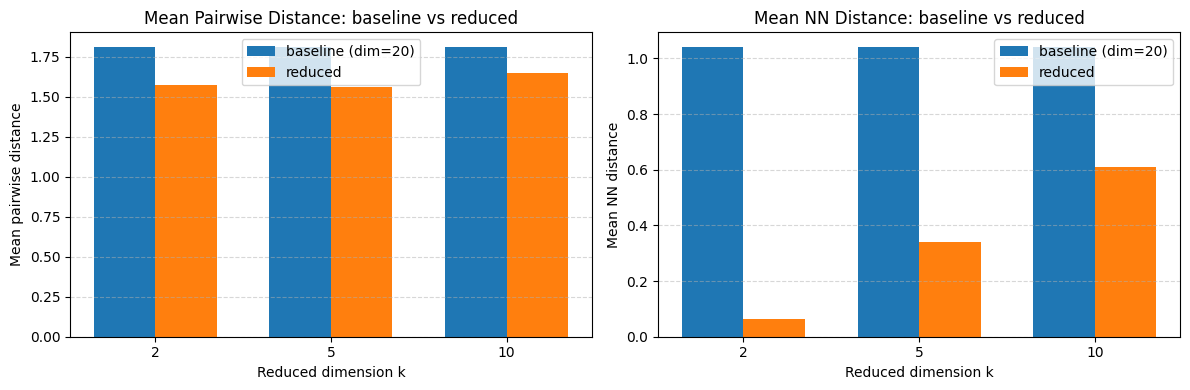

In [17]:
dims_plot = list(result_2d['New Dim'])
mpd_vals = list(result_2d['Mean Distance'])
mnn_vals = list(result_2d['Mean NN Distance'])
mpd_pct = list(result_2d['Mean Distance Change (percent)'])
mnn_pct = list(result_2d['Mean NN Change (percent)'])

baseline_mpd = result_2b['Mean Distance'][result_2b.Dim==20].values[0]
baseline_mnn = result_2b['Mean Nearest Distance'][result_2b.Dim==20].values[0]


x = np.arange(len(dims_plot))
width = 0.35

fig, axes = plt.subplots(1, 2, figsize=(12, 4))


axes[0].bar(x - width/2, [baseline_mpd]*len(dims_plot), width, label='baseline (dim=20)')
axes[0].bar(x + width/2, mpd_vals, width, label='reduced')
axes[0].set_xticks(x)
axes[0].set_xticklabels(dims_plot)
axes[0].set_xlabel('Reduced dimension k')
axes[0].set_ylabel('Mean pairwise distance')
axes[0].set_title('Mean Pairwise Distance: baseline vs reduced')
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.5)


axes[1].bar(x - width/2, [baseline_mnn]*len(dims_plot), width, label='baseline (dim=20)')
axes[1].bar(x + width/2, mnn_vals, width, label='reduced')
axes[1].set_xticks(x)
axes[1].set_xticklabels(dims_plot)
axes[1].set_xlabel('Reduced dimension k')
axes[1].set_ylabel('Mean NN distance')
axes[1].set_title('Mean NN Distance: baseline vs reduced')
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

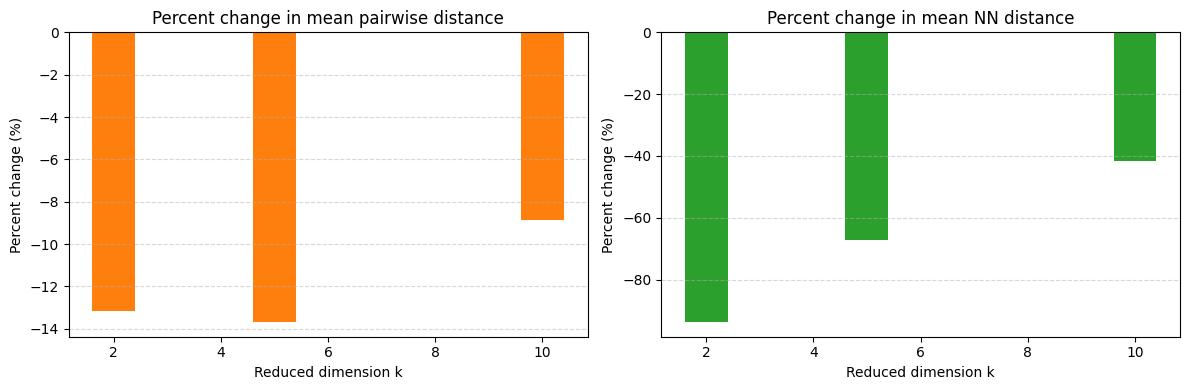

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].bar(dims_plot, mpd_pct, color='C1')
ax[0].axhline(0, color='k', linewidth=0.7)
ax[0].set_xlabel('Reduced dimension k')
ax[0].set_ylabel('Percent change (%)')
ax[0].set_title('Percent change in mean pairwise distance')
ax[0].grid(axis='y', linestyle='--', alpha=0.5)

ax[1].bar(dims_plot, mnn_pct, color='C2')
ax[1].axhline(0, color='k', linewidth=0.7)
ax[1].set_xlabel('Reduced dimension k')
ax[1].set_ylabel('Percent change (%)')
ax[1].set_title('Percent change in mean NN distance')
ax[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Question 3


## Import Dataset

In [19]:
from sklearn.datasets import fetch_20newsgroups


newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), random_state=0)
df = pd.DataFrame({"text": newsgroups.data, "target": newsgroups.target,
                   "target_name": [newsgroups.target_names[i] for i in newsgroups.target]})

df.head()

,text,target,target_name
0,FOR SALE\n\n 1945 King Feature...,6,misc.forsale
1,Earlier today I read an ad for REAL-3D animati...,1,comp.graphics
2,Can someone cite Biblical references to homose...,15,soc.religion.christian
3,My friends and I have a buch of books for sale...,6,misc.forsale
4,\n\nThey are using some technology developed b...,11,sci.crypt


## TF-IDF vectorization

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=20000,
    dtype=np.float32,
    norm='l2')

X = vectorizer.fit_transform(df['text'])
X = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
y = df['target']

data = pd.concat([X, y], axis=1)
data[:5]

,00,000,0000,00000,00010001b,000iu,001,00100010b,005,007,...,zuo,zur,zv,zvm,zw,zx,zy,zyxel,zz,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11


## a) JL-Lemma experiment

In [21]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim


n_values = [2000, 5000, 10000, 15000]
eps_values = [0.1, 0.2, 0.3, 0.5]


jl_test_result = pd.DataFrame(index=n_values, columns=eps_values)

for n in n_values:
    for eps in eps_values:
        m = johnson_lindenstrauss_min_dim(n_samples=n, eps=eps)
        jl_test_result.loc[n, eps] = m

jl_test_result

,0.1,0.2,0.3,0.5
2000,6515,1754,844,364
5000,7300,1965,946,408
10000,7894,2125,1023,442
15000,8242,2219,1068,461


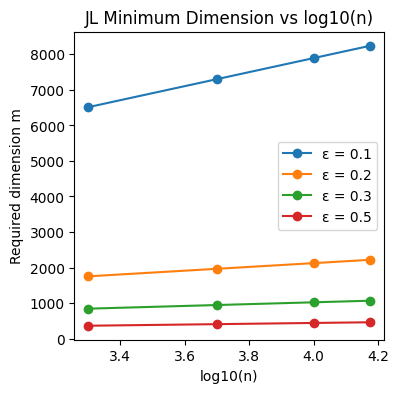

In [22]:
plt.figure(figsize=(4, 4))

for eps in eps_values:
    m_values = jl_test_result[eps].values
    plt.plot(np.log10(n_values), m_values, marker='o', label=f"ε = {eps}")

plt.xlabel("log10(n)")
plt.ylabel("Required dimension m")
plt.title("JL Minimum Dimension vs log10(n)")
plt.legend()
plt.show()

## b) (JL) Minimum Required Dimension Using Johnson–Lindenstrauss Bound

### Sample 50,000 random distinct index pairs

In [23]:
rng = np.random.RandomState(0)
num_pairs = 50000
n_samples = X.shape[0]

pairs = set()
while len(pairs) < num_pairs:
    i = rng.randint(0, n_samples)
    j = rng.randint(0, n_samples)

    if i == j:
        continue

    diff = X.loc[i] - X.loc[j]

    if (diff == 0).all():
        continue

    pairs.add((i, j))

pairs = np.array(list(pairs))
print(pairs.shape)
pairs[0:5]

(50000, 2)


array([[ 4037, 11973],
       [ 5445,   393],
       [ 9417, 14074],
       [ 5795, 14735],
       [ 2536,   172]])

### Compute original Euclidean distances

In [24]:
def euclidean(a, b):
    return np.sqrt(np.sum((a - b)**2))

orig_dist = np.zeros(num_pairs, dtype=np.float32)

for k, (i, j) in enumerate(pairs):
    orig_dist[k] = euclidean(X.loc[i].values, X.loc[j].values)

### Gaussian Random Projection for dimensions m & ∈

In [25]:
from sklearn.random_projection import GaussianRandomProjection

rng = np.random.RandomState(0)
m_values = [50, 100, 200, 500, 1000, 2000, 5000]
eps_values = [0.02, 0.05, 0.10]
num_pairs = 50000


result_3b = []
for m in m_values:
    rp = GaussianRandomProjection(n_components=m, random_state=0)
    X_reduce = rp.fit_transform(X.values)

    proj_dist = np.zeros(num_pairs, dtype=np.float32)
    for k, (i, j) in enumerate(pairs):
        proj_dist[k] = euclidean(X_reduce[i], X_reduce[j])

    ratios = proj_dist / orig_dist

    for eps in eps_values:
        mask = (ratios >= 1 - eps) & (ratios <= 1 + eps)
        pct_inside = 100 * mask.mean()

        result_3b.append({
            "m": m,
            "epsilon": eps,
            "mean_ratio": ratios.mean(),
            "median_ratio": np.median(ratios),
            "p05_ratio": np.percentile(ratios, 5),
            "p95_ratio": np.percentile(ratios, 95),
            "percent_inside_1±eps": pct_inside
        })

result_3b = pd.DataFrame(result_3b)
result_3b

,m,epsilon,mean_ratio,median_ratio,p05_ratio,p95_ratio,percent_inside_1±eps
0,50,0.02,0.998367,0.996813,0.836291,1.166965,15.712
1,50,0.05,0.998367,0.996813,0.836291,1.166965,38.106
2,50,0.10,0.998367,0.996813,0.836291,1.166965,67.880
3,100,0.02,0.999598,0.999219,0.885189,1.116560,22.380
4,100,0.05,0.999598,0.999219,0.885189,1.116560,52.494
5,100,0.10,0.999598,0.999219,0.885189,1.116560,84.490
6,200,0.02,0.997614,0.997359,0.915999,1.079555,31.184
7,200,0.05,0.997614,0.997359,0.915999,1.079555,68.520
8,200,0.10,0.997614,0.997359,0.915999,1.079555,95.522
9,500,0.02,0.998565,0.998336,0.947276,1.050514,47.578
